In [1]:
import pandas as pd
import math
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf

data = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',skiprows=4)
data.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Aggravated Assault', 'Property Crime', 'Burglary', 'Larceny-theft', 'Motorvehicle Theft', 'Arson']
#data.dropna(inplace=True)
data.isnull().any() #Is NaN present?
data = data.fillna(method='ffill') #propagate non-null values forward or backward.

In [2]:
data['MurderExists'] = data['Murder'].apply(lambda x: 0 if x == 0.0 or x > 100.0 else 1)
data['RobberyExists'] = data['Robbery'].apply(lambda x: 0 if x == 0.0 or x >10000.0 else 1)
data.head(20)

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motorvehicle Theft,Arson,MurderExists,RobberyExists
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,0.0,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,0.0,0,1
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,0.0,0,1
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0,0,0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0,1,1
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0,0,1
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0,0,1


First I shall retrieve the R^2 value of Robbery and Murder based on its effects on Property Crime, and the result I come up with is 0.99 or 99%. This tells me that Robbery and Murder amounts for roughly 99% of the variance in Property Crime. However we do not know how much Robbery and Murder individually affect the variance of Property Crime. We also know that Murder has the highest increase when property crime increases. 

In [3]:
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Murder','Robbery']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[123.23811315   5.2432895 ]]

Intercept: 
 [218.26357256]

R-squared:
0.9976686964721456


Here I created a few scatter plots to better understand what kind of relation Burglary, Murder, Robbery and Aggravated Assault has with Property Crime. As can be seen all four dependent variables have a linear relationship with Property Crime, with Burglary and Murder having a steeper incline then Robbery and Aggravated Assault. 

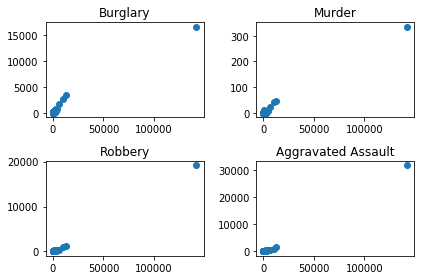

In [4]:
plt.subplot(2,2,1)
plt.scatter(data['Property Crime'], data['Burglary'])
plt.title('Burglary')
#plt.xlim(0,4000)
#plt.ylim(0,1000)
plt.subplot(2,2,2)
plt.scatter(data['Property Crime'], data['Murder'])
plt.title('Murder')
plt.subplot(2,2,3)
plt.scatter(data['Property Crime'], data['Robbery'])
plt.title('Robbery')
plt.subplot(2,2,4)
plt.scatter(data['Property Crime'], data['Aggravated Assault'])
plt.title('Aggravated Assault')
plt.tight_layout() #makes it fit better
plt.show()

In [5]:
newdata = data[~(data[['MurderExists','RobberyExists']] == 0).any(axis=1)] #Gets rid of all rows where there is no murder/robbery

Here I cleaned the data using the code line above to get rid of all rows where there was no murder and robbery. Then I re-created the scatter plot to see the difference between them. As can be seen they are relatively similar to one another.

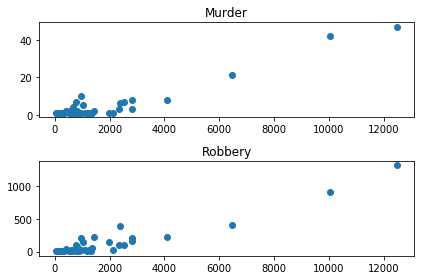

In [6]:
plt.subplot(2,1,1)
plt.scatter(newdata['Property Crime'], newdata['Murder'])
plt.title('Murder')
plt.subplot(2,1,2)
plt.scatter(newdata['Property Crime'], newdata['Robbery'])
plt.title('Robbery')
plt.tight_layout() #makes it fit better
plt.show()

Here I fooled around with sqrt,pow,log, and reciprocal on the 'Murder' data set in order to see if I can create a better linear fit for the data (although the unaltered data works just as well)

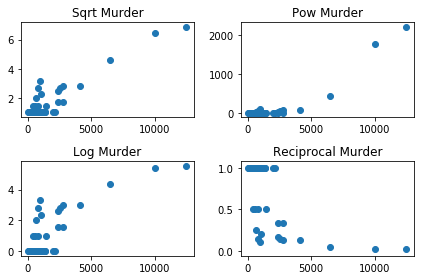

In [7]:
plt.subplot(2,2,1)
sqrt_feature = [math.sqrt(x) for x in  newdata['Murder']]
plt.scatter(newdata['Property Crime'], sqrt_feature)
plt.title('Sqrt Murder')
plt.subplot(2,2,2)
pow_feature = [math.pow(x,2) for x in  newdata['Murder']]
plt.scatter(newdata['Property Crime'], pow_feature)
plt.title('Pow Murder')
plt.subplot(2,2,3)
log_feature = [math.log(x,2) for x in  newdata['Murder']]
plt.scatter(newdata['Property Crime'], log_feature)
plt.title('Log Murder')
plt.subplot(2,2,4)
reciprocal_feature = [np.reciprocal(x) for x in  newdata['Murder']]
plt.scatter(newdata['Property Crime'], reciprocal_feature)
plt.title('Reciprocal Murder')
plt.tight_layout() 
plt.show()

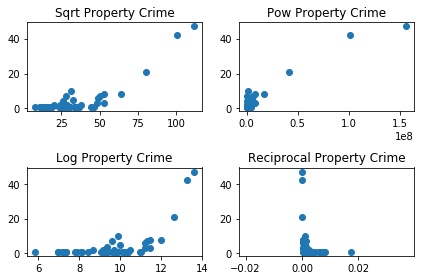

In [8]:
plt.subplot(2,2,1)
psqrt_feature = [math.sqrt(x) for x in  newdata['Property Crime']]
plt.scatter(psqrt_feature, newdata['Murder'])
plt.title('Sqrt Property Crime')
plt.subplot(2,2,2)
ppow_feature = [math.pow(x,2) for x in  newdata['Property Crime']]
plt.scatter(ppow_feature, newdata['Murder'])
plt.title('Pow Property Crime')
plt.subplot(2,2,3)
plog_feature = [math.log(x,2) for x in  newdata['Property Crime']]
plt.scatter(plog_feature, newdata['Murder'])
plt.title('Log Property Crime')
plt.subplot(2,2,4)
preciprocal_feature = [np.reciprocal(x) for x in  newdata['Property Crime']]
plt.scatter(preciprocal_feature, newdata['Murder'])
plt.title('Reciprocal Property Crime')
plt.tight_layout() 
plt.show()

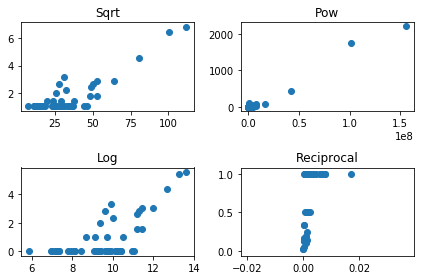

In [9]:
plt.subplot(2,2,1)
plt.scatter(psqrt_feature, sqrt_feature)
plt.title('Sqrt')
plt.subplot(2,2,2)
plt.scatter(ppow_feature, pow_feature)
plt.title('Pow')
plt.subplot(2,2,3)
plt.scatter(plog_feature, log_feature)
plt.title('Log')
plt.subplot(2,2,4)
plt.scatter(preciprocal_feature, reciprocal_feature)
plt.title('Reciprocal')
plt.tight_layout() 
plt.show()

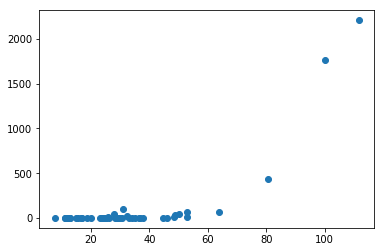

In [14]:
plt.scatter(psqrt_feature, pow_feature)

Here I redid the formula to find the R^2 value to see if there was any major changes after I cleaned my data. The R^2 now is less then it was before (99% down to 92%) with the murder coefficients also decreasing slightly. I also created a histogram plot to check if property crime had a normal distribution with the dependent variables of Murder and Robbery, which it does. 


Coefficients: 
 [[118.96252671   5.11110343]]

Intercept: 
 [469.12256093]

R-squared:
0.9260310939058841


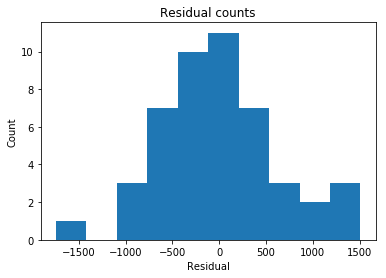

In [11]:
newregr = linear_model.LinearRegression()
newY = newdata['Property Crime'].values.reshape(-1, 1)
newX = newdata[['Murder','Robbery']]
#newY = np.asarray(ppow_feature).reshape(-1, 1)
#newX = newdata[['Murder','Robbery']]
newregr.fit(newX, newY)

print('\nCoefficients: \n', newregr.coef_)
print('\nIntercept: \n', newregr.intercept_)
print('\nR-squared:')
print(newregr.score(newX, newY))

# Extract predicted values.
predicted = newregr.predict(newX).ravel()
actual = newdata['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

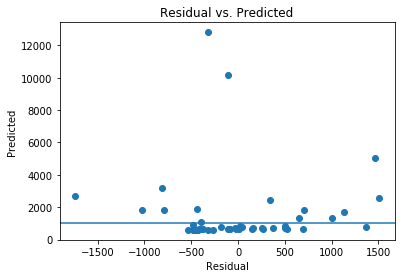

In [12]:
plt.scatter(residual, predicted)
plt.xlabel('Residual')
plt.ylabel('Predicted')
plt.axhline(y=1000)
plt.title('Residual vs. Predicted')
plt.show()

In [13]:
correlation_matrix = newX.corr()
display(correlation_matrix)

,Murder,Robbery
Murder,1.000000,0.961628
Robbery,0.961628,1.000000
